In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

pd.options.display.max_columns = None

In [ ]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [ ]:
# Separate numerical and categorical columns
num_cols = list(train.select_dtypes(exclude='O').columns)
cat_cols = list(train.select_dtypes(include='O').columns)

len(num_cols), len(cat_cols)

(37, 43)

### Exploring Numerical Features

<Axes: xlabel='SalePrice', ylabel='Count'>

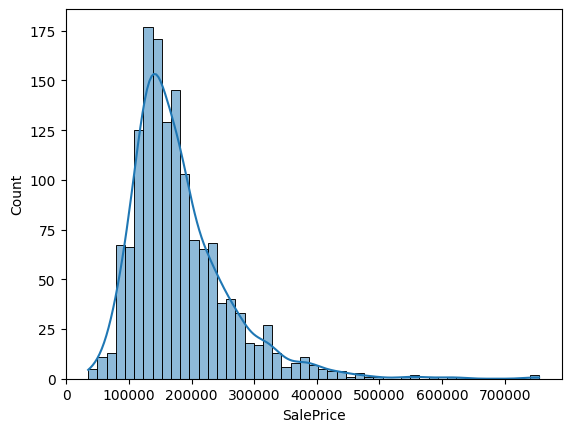

In [ ]:
# SalePrice distribution -- will need normalising
sns.histplot(train['SalePrice'], kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

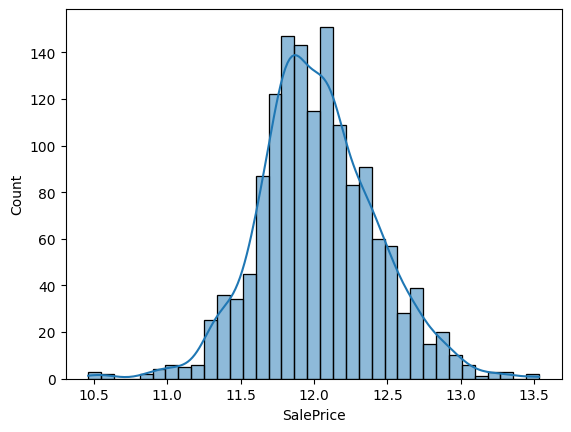

In [ ]:
# Normalised SalePrice using log-transform -- note for feature scaling
sns.histplot(np.log1p(train['SalePrice']), kde=True)

In [ ]:
# Observations:
# Year, MSSubClass should be categorically encoded
# Some features heavily skewed. Applying log transform should help
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


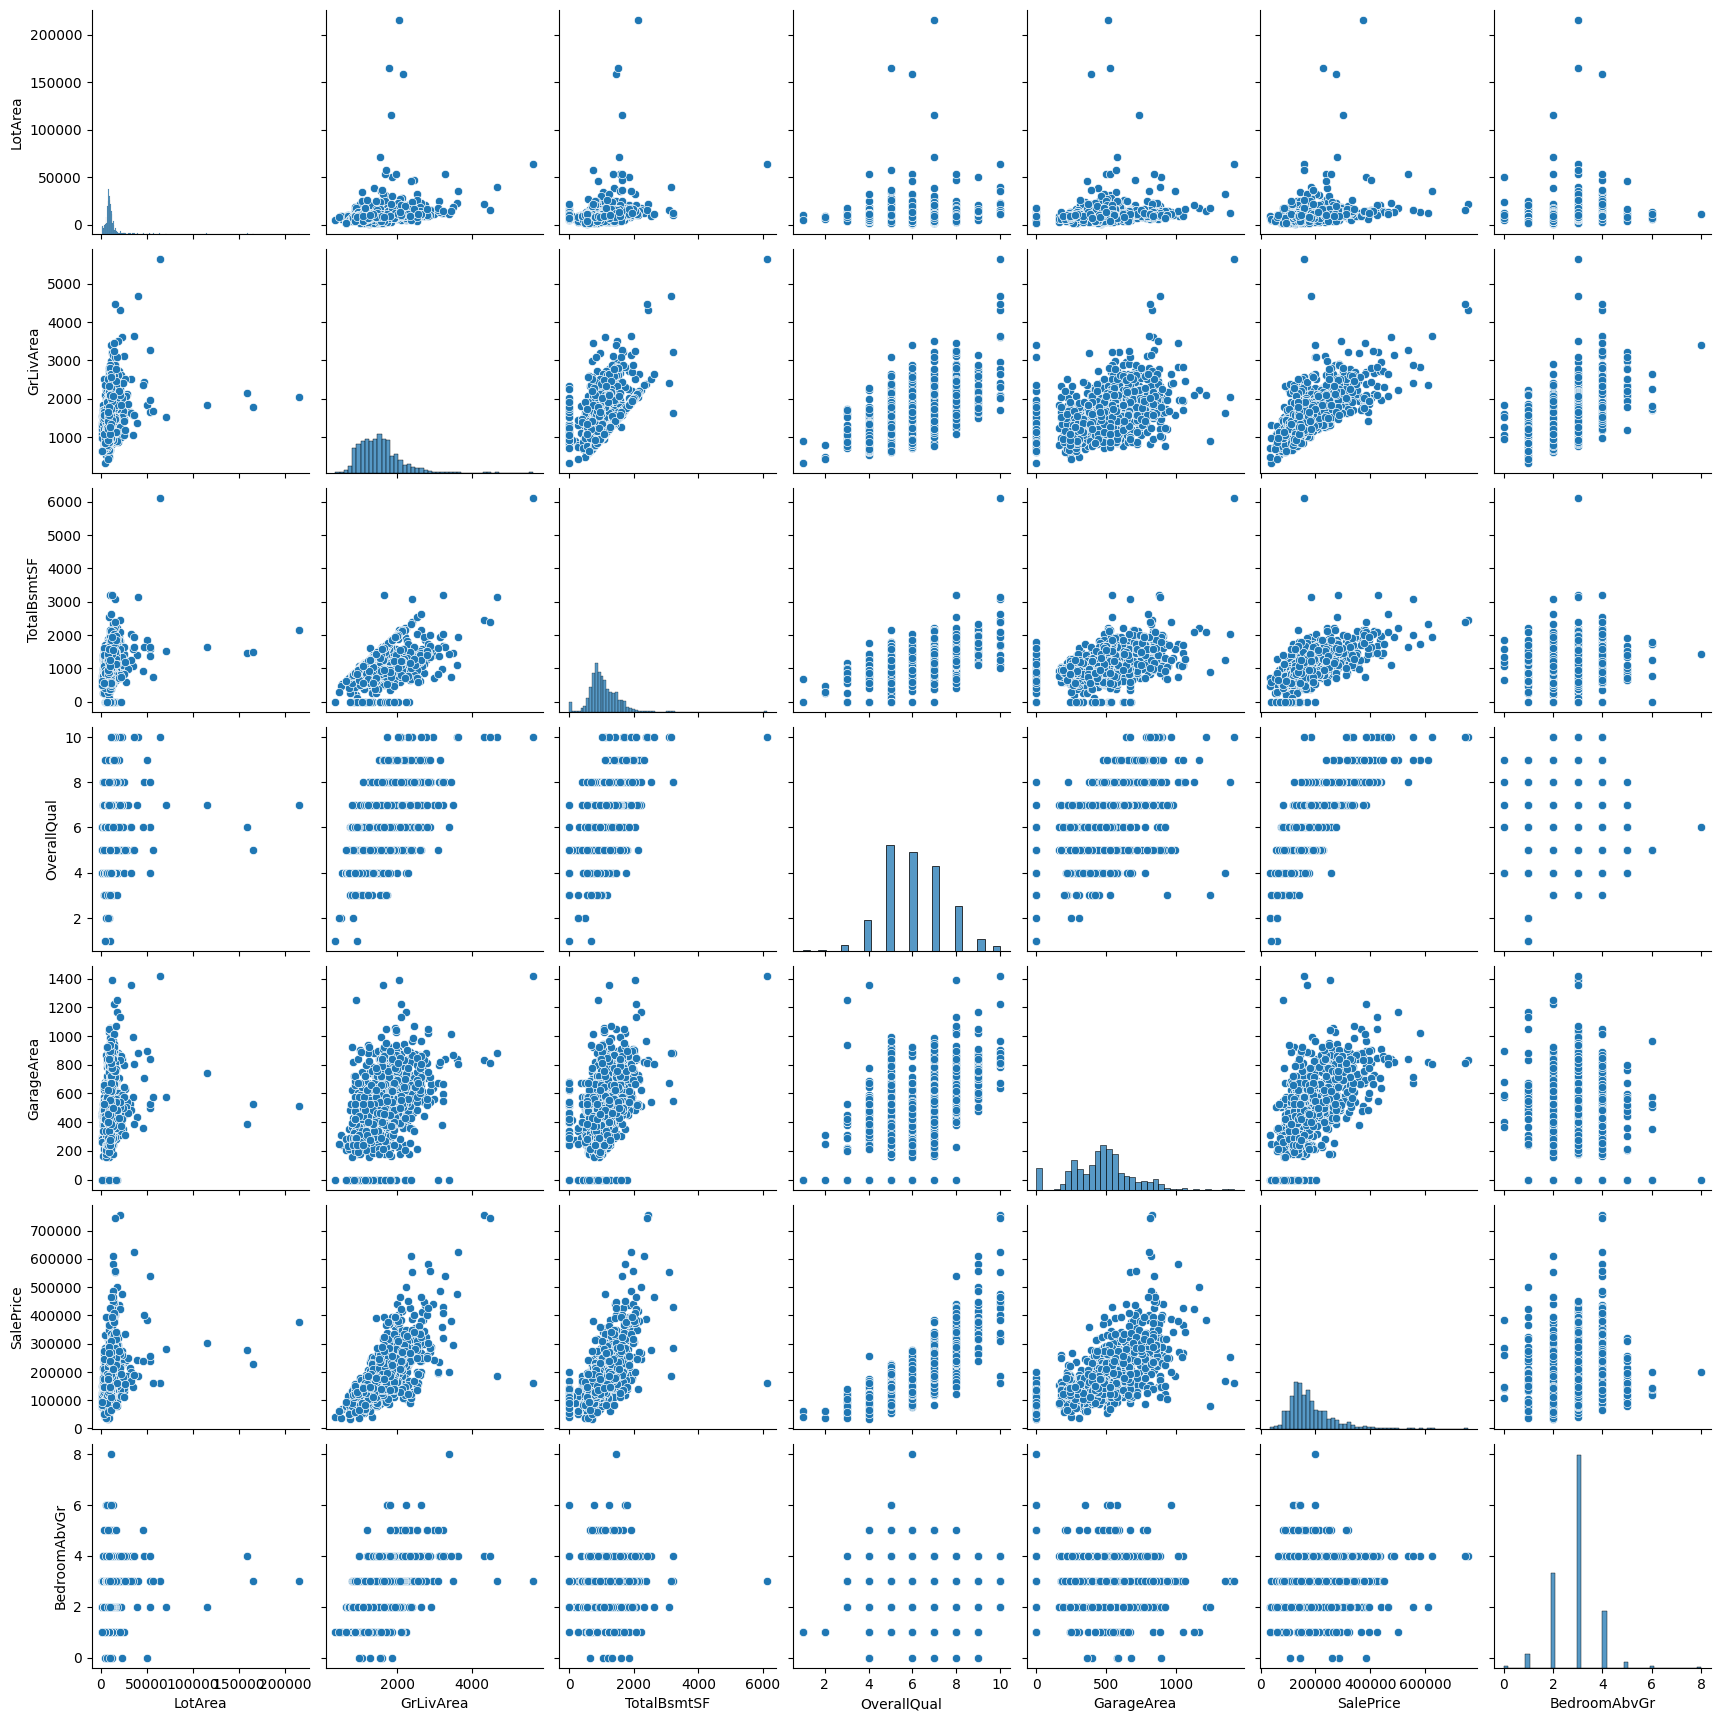

In [ ]:
# Comparing major house-buying features
area_group = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageArea', 'SalePrice', 'BedroomAbvGr']
sns.pairplot(train[area_group])

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

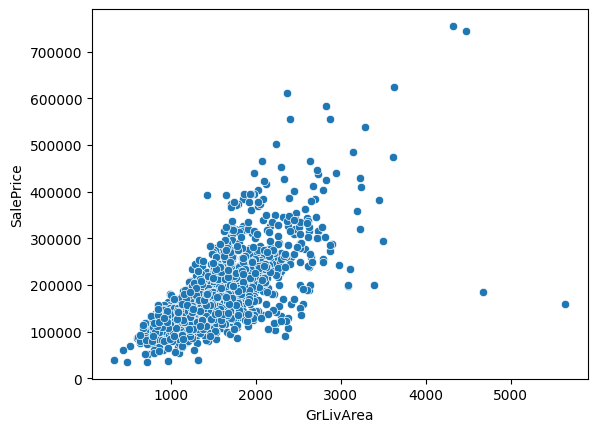

In [ ]:
# Two clear outliers
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

In [ ]:
# Remove outliers
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)

<Axes: >

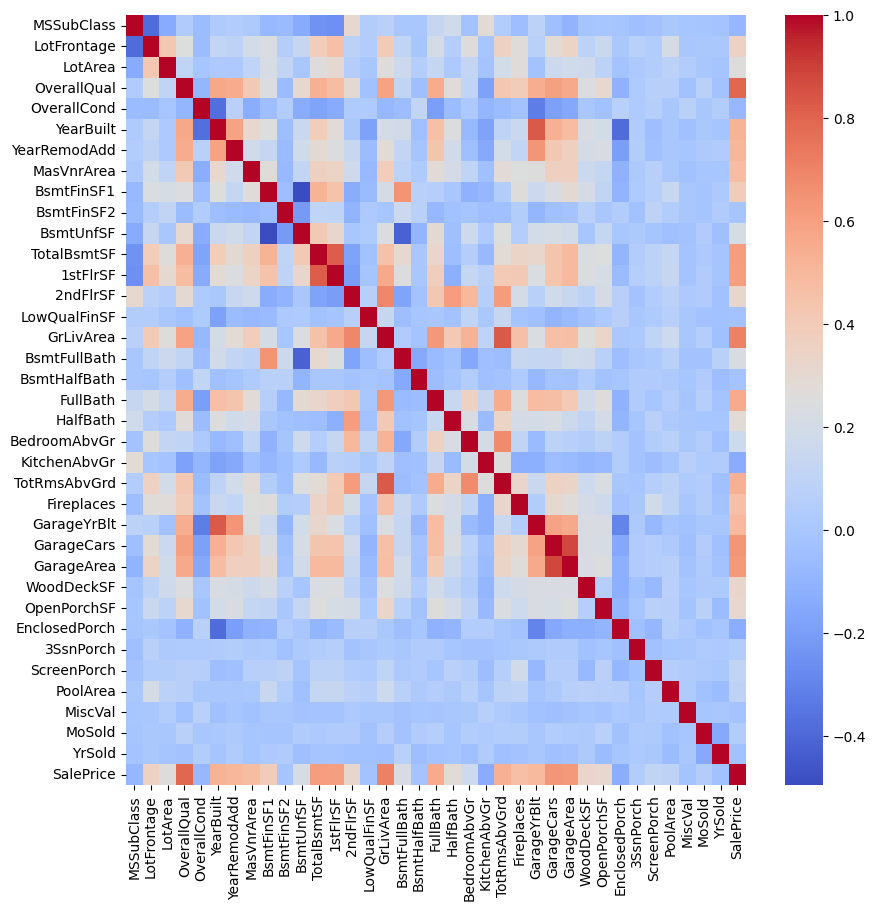

In [ ]:
# Would be good to have more features strongly correlated with SalePrice
# Combining features, e.g. house total surface area, should help
plt.figure(figsize=(10, 10))
sns.heatmap(train[num_cols].corr(), cmap='coolwarm')

In [ ]:
# Features most (+)correlated with SalePrice
most_cor = train[num_cols].corr()['SalePrice'].sort_values(ascending=False).head(20)
most_cor

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [ ]:
# Features most (-)correlated with SalePrice
train[num_cols].corr()['SalePrice'].sort_values(ascending=True).head(5)

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923


<Axes: >

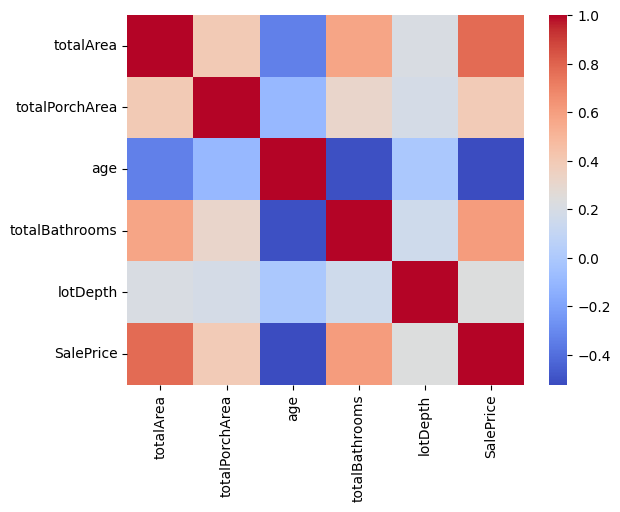

In [ ]:
# Check if combined features correlate well with SalePrice
# Observations: all combined features do, except lotDepth, which assumes lot is rectangular
for df in [train, test]:
  df['totalArea'] = df['TotalBsmtSF'] + df['GrLivArea']
  df['totalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
  df['age'] = df['YrSold'] - df['YearBuilt']
  df['totalBathrooms'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
  df['lotDepth'] = df['LotArea'] / df['LotFrontage']

combined_feats = ['totalArea', 'totalPorchArea', 'age', 'totalBathrooms', 'lotDepth', 'SalePrice']
sns.heatmap(train[combined_feats].corr(), cmap='coolwarm')

In [ ]:
combined_feats.remove('SalePrice')
train.drop(combined_feats, axis=1, inplace=True)
test.drop(combined_feats, axis=1, inplace=True)

### Exploring Categorical Features

In [ ]:
# Observations:
# all but one utility the same -- should remove
# Extrerior1st/2nd, Neighborhood have high cardinality
# Alley, Fence should maybe be dropped
# PoolQC should be dropped

train[cat_cols].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
# Describe categorical feature value counts
for col in cat_cols:
  print(train[col].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker   

<ipython-input-55-1c475cfe4366>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


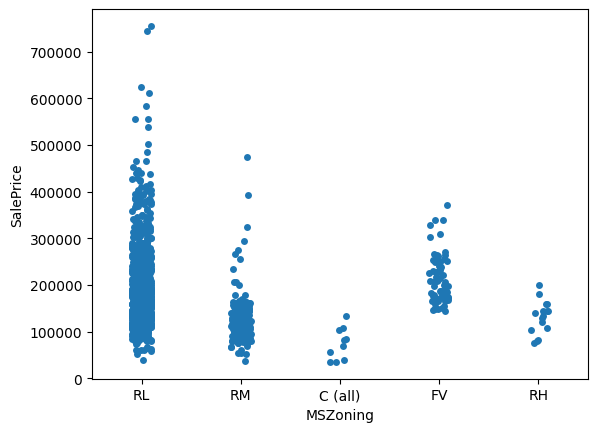

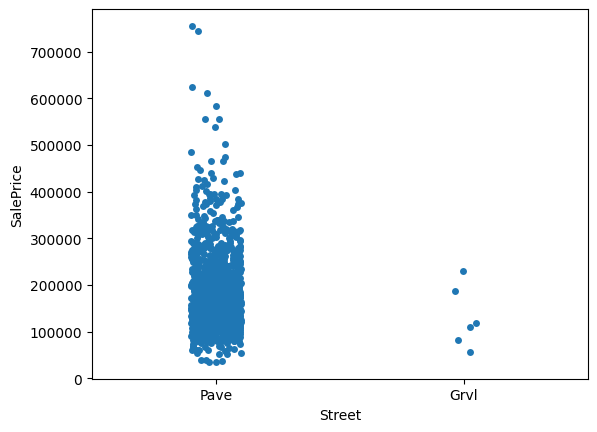

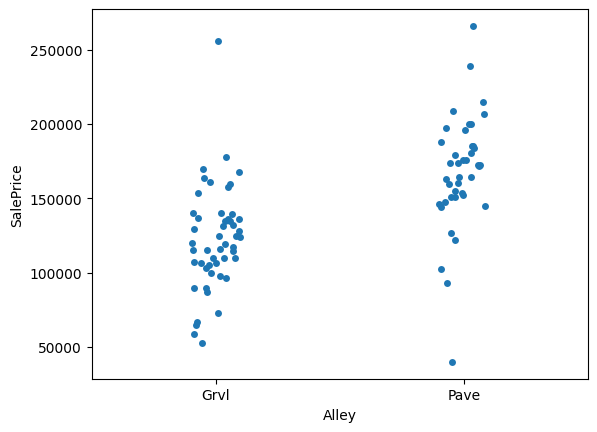

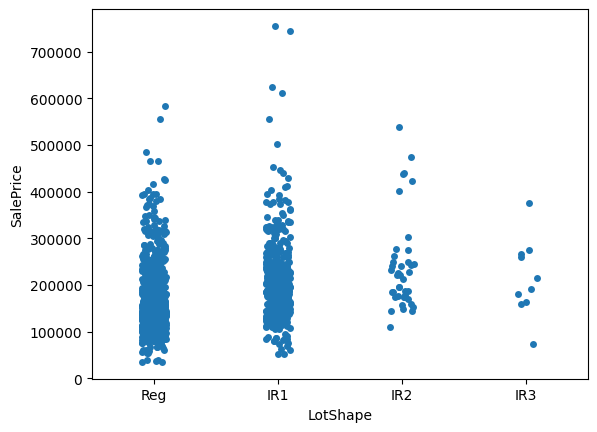

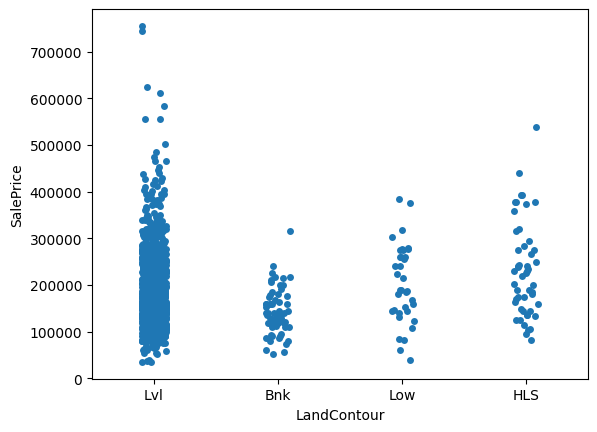

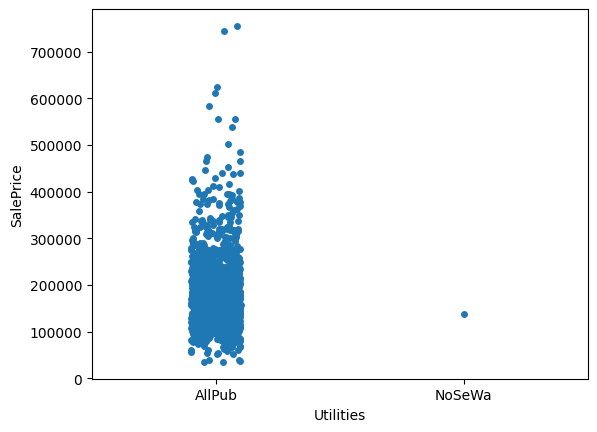

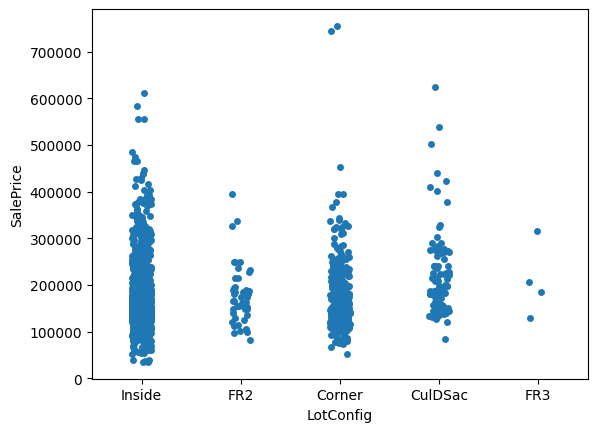

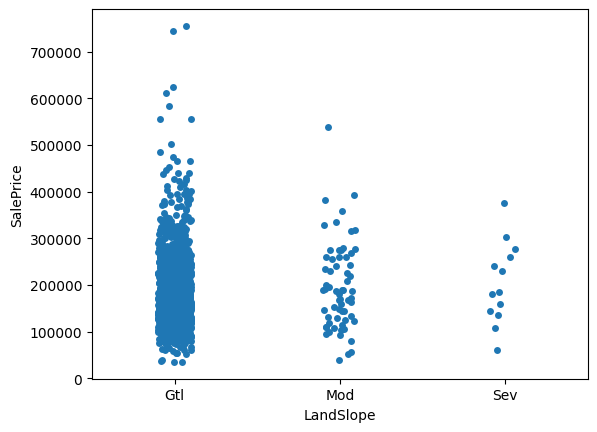

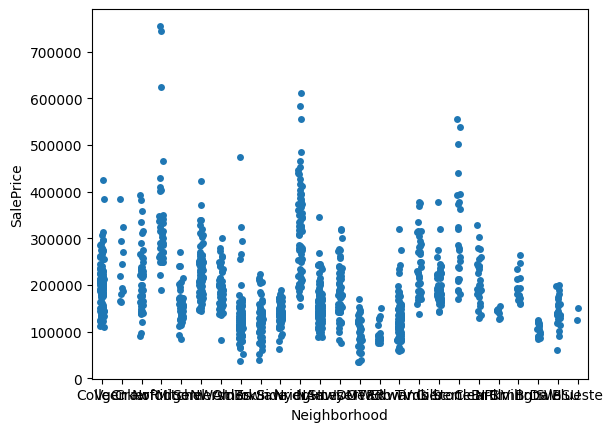

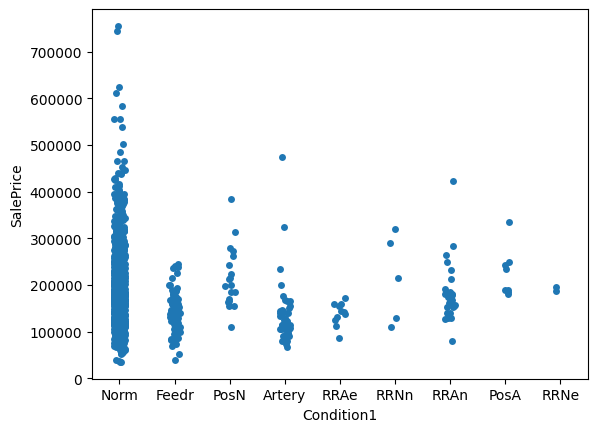

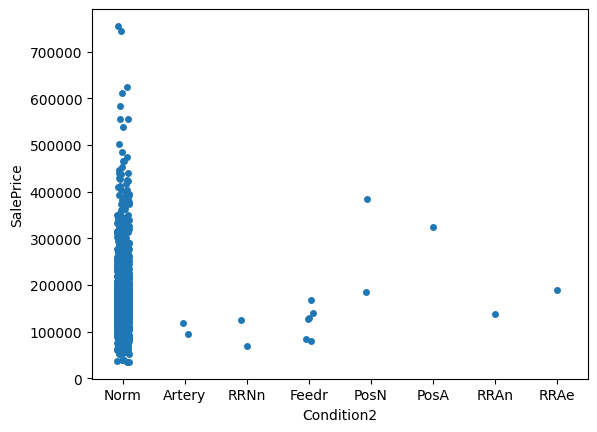

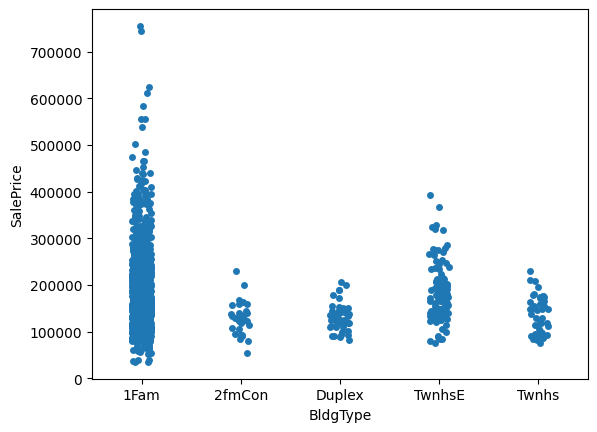

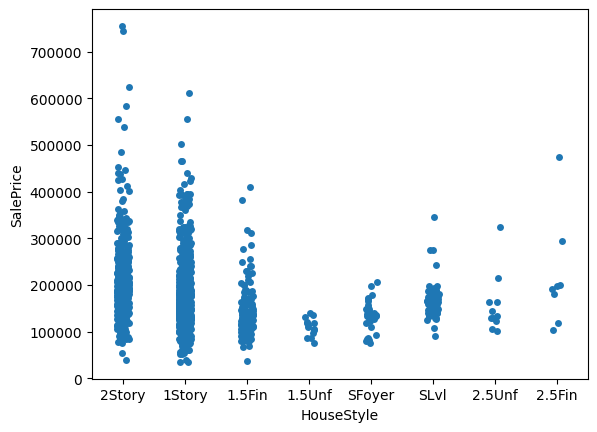

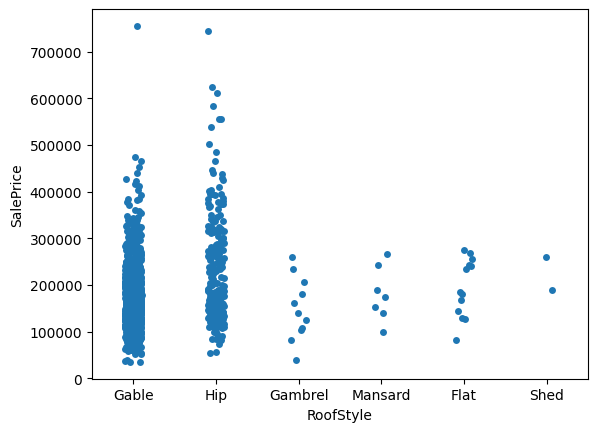

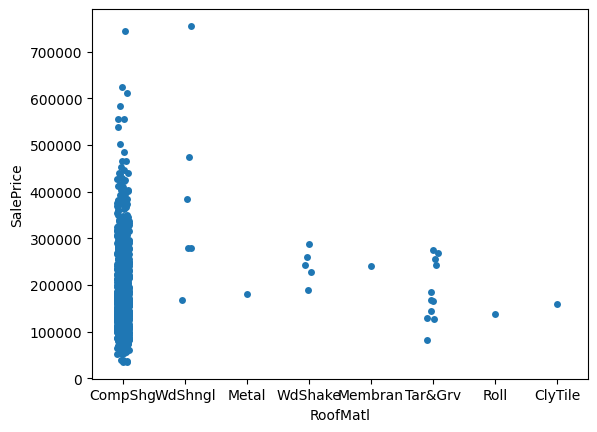

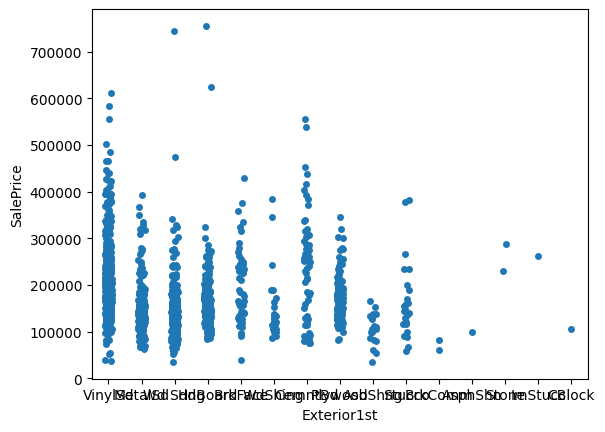

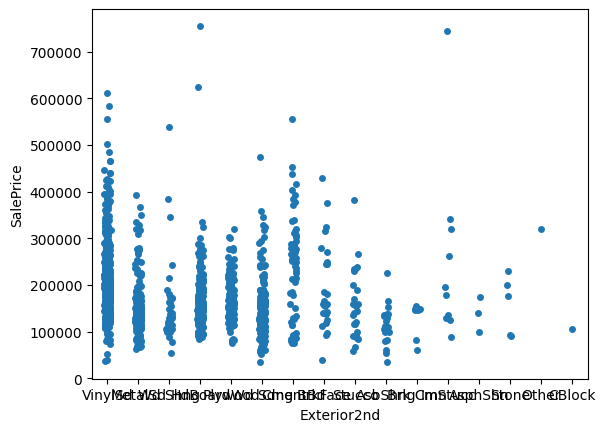

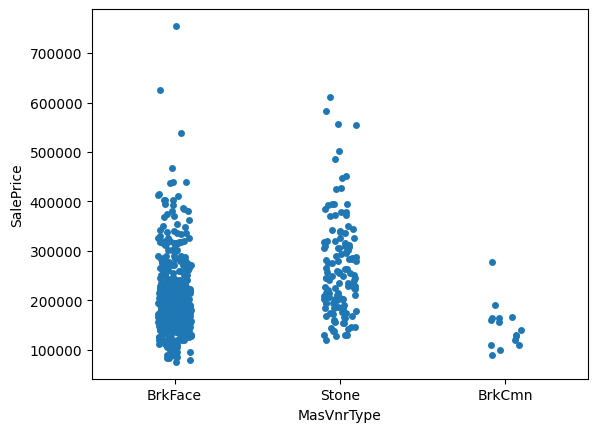

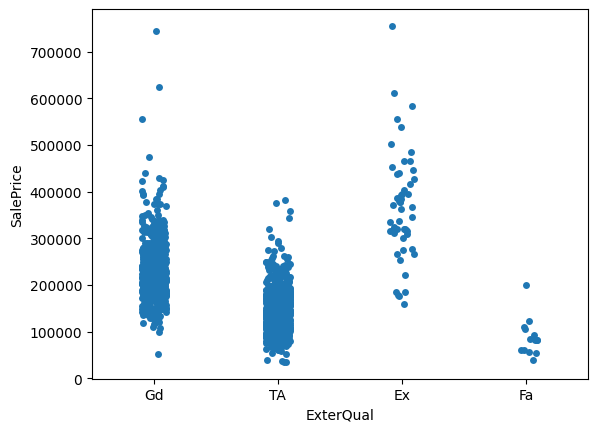

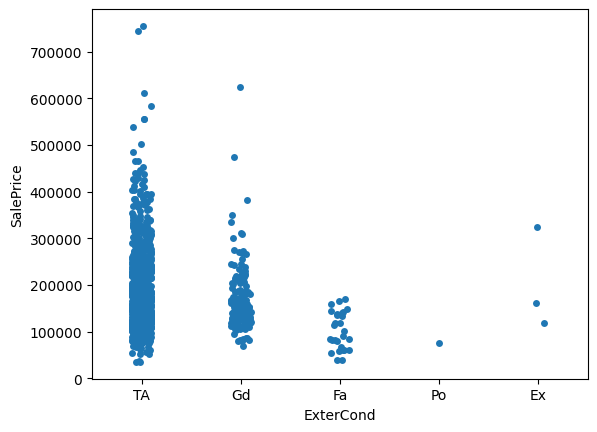

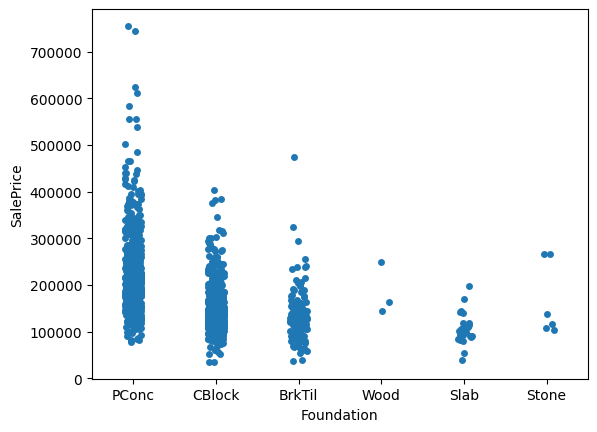

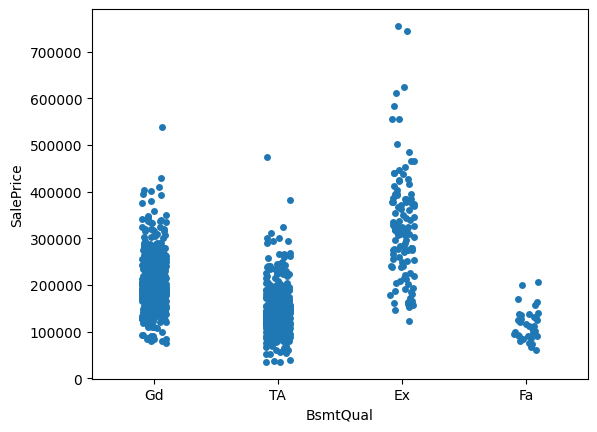

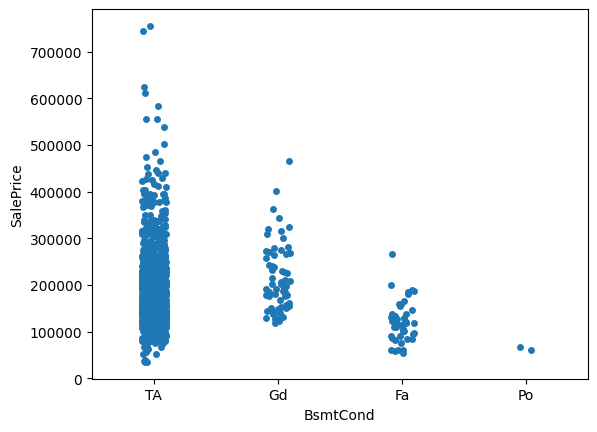

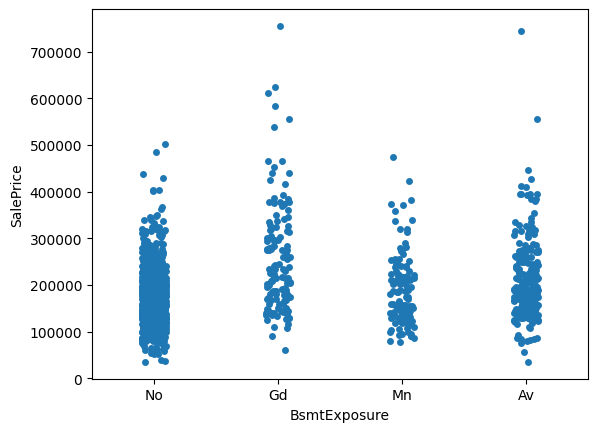

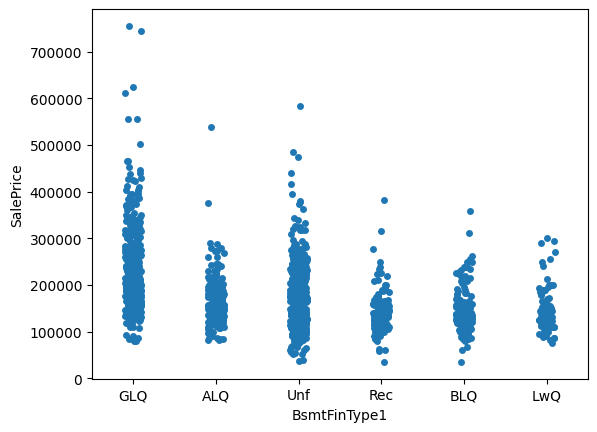

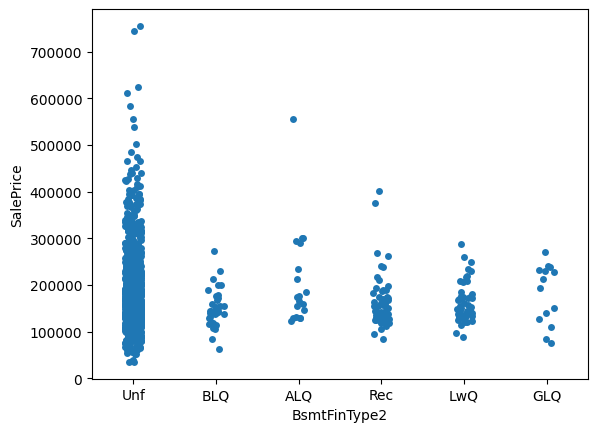

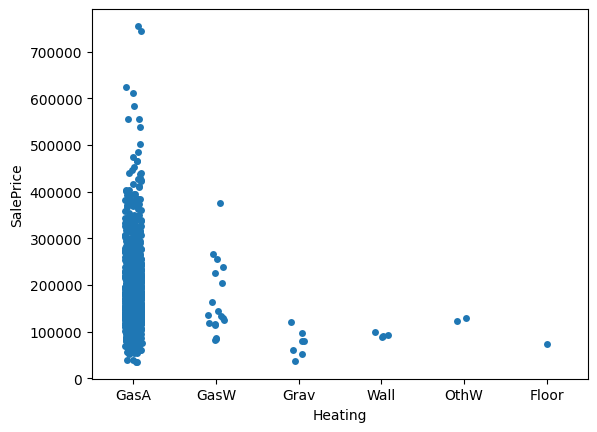

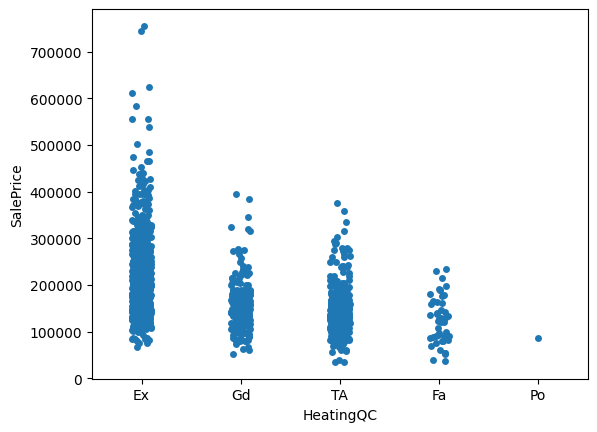

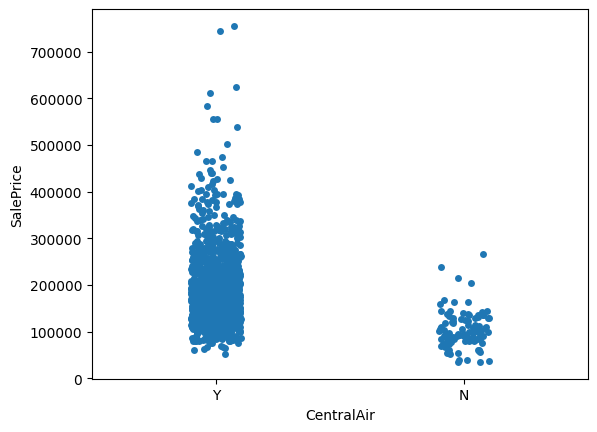

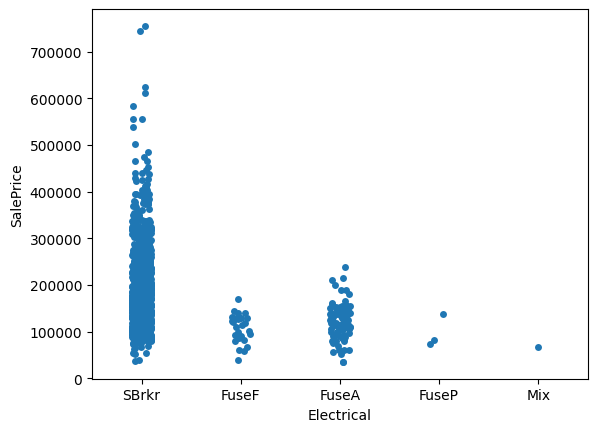

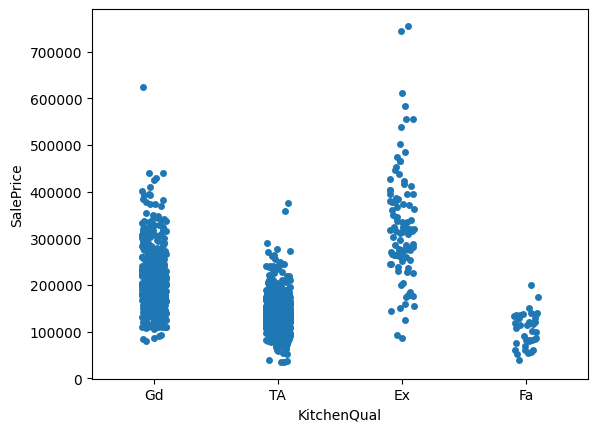

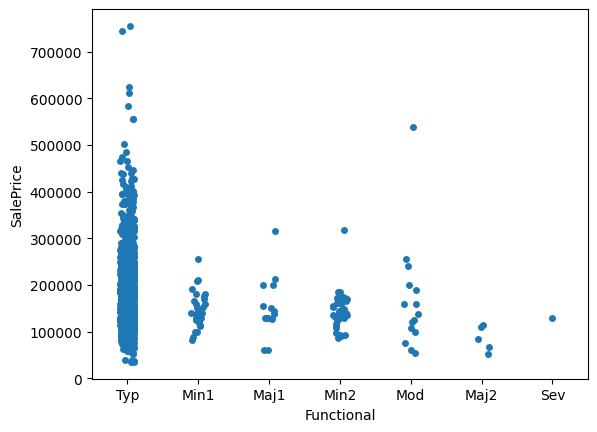

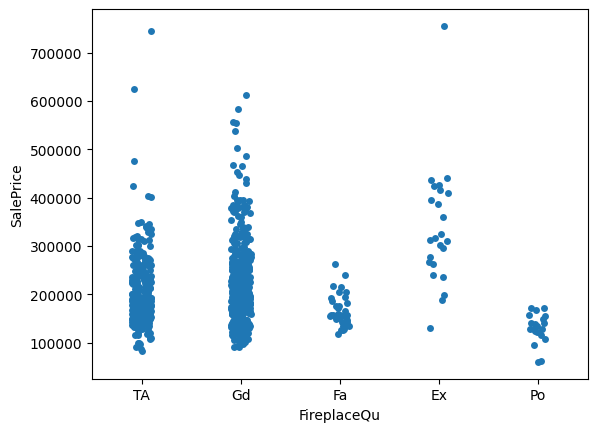

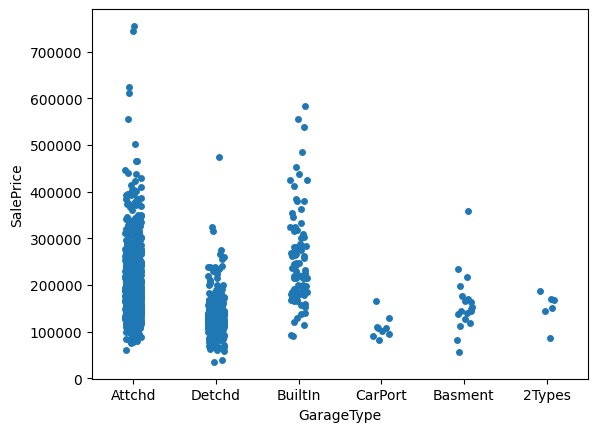

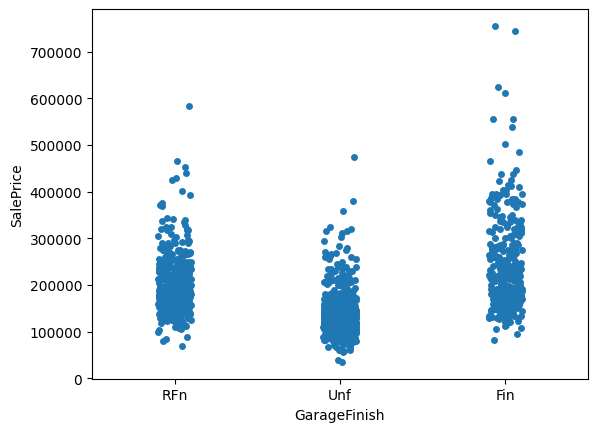

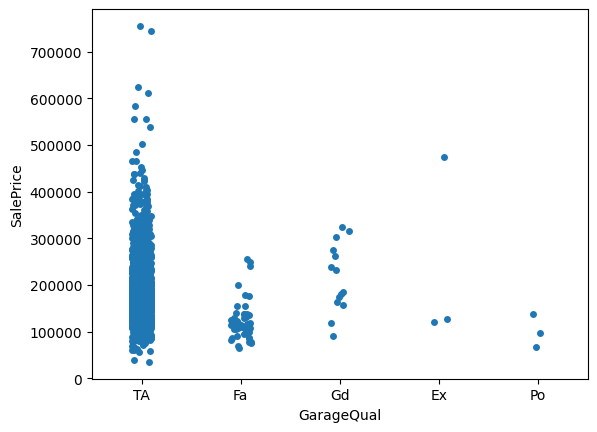

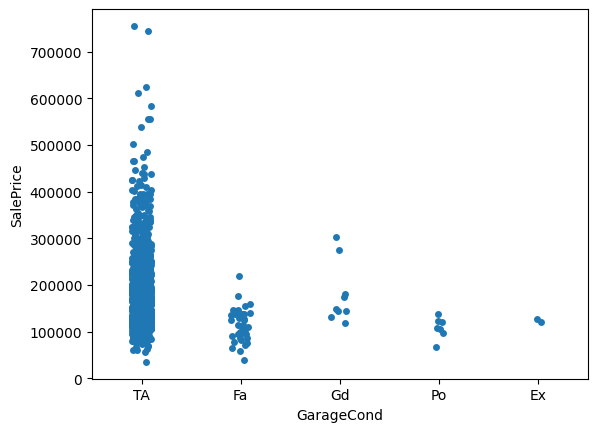

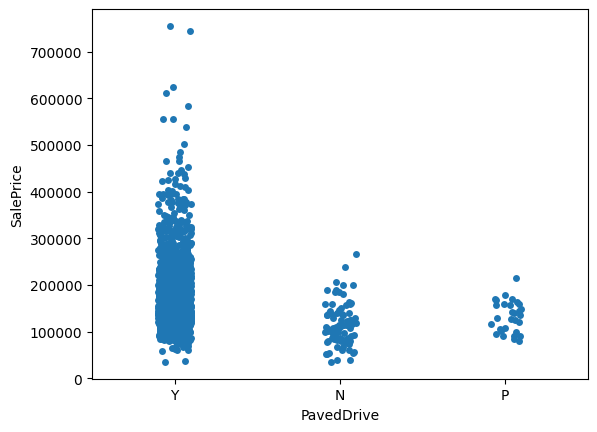

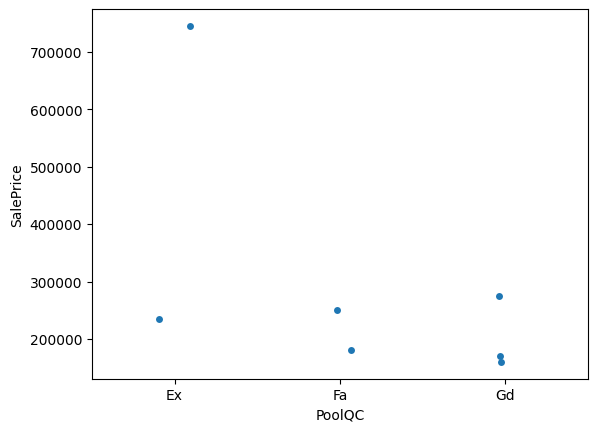

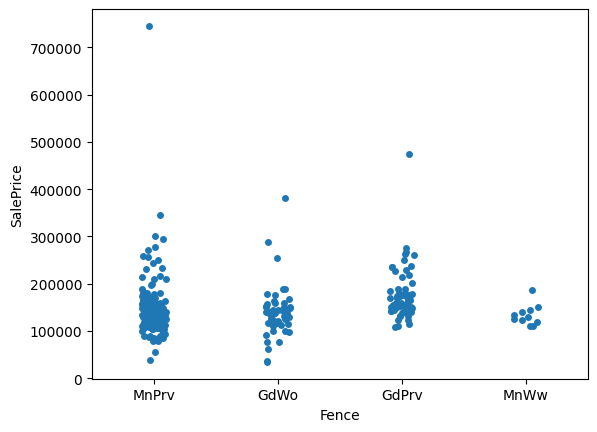

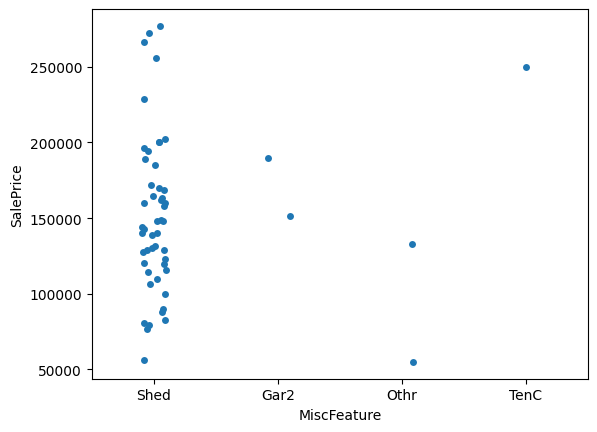

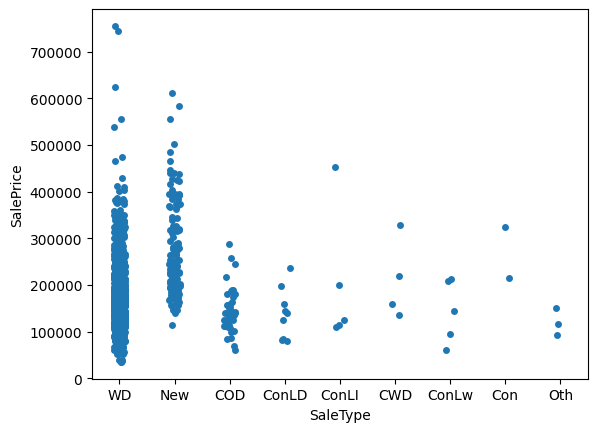

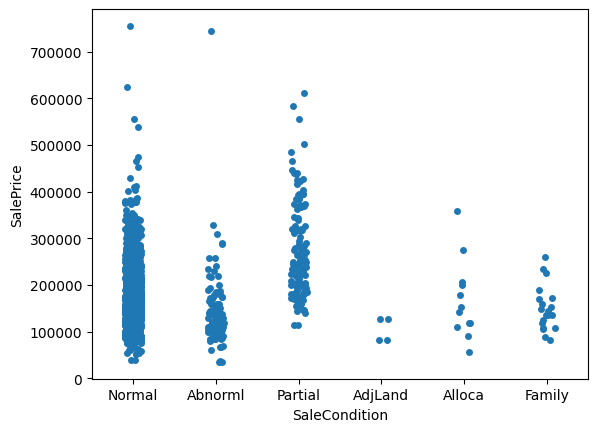

In [ ]:
# Visualising category distributions
for col in cat_cols:
  plt.figure()
  sns.stripplot(x=train[col], y=train['SalePrice'])

### Exploring Missing Values

In [ ]:
# Missing value perecentages
print('% of empty cells: ', np.round(100 * train.isnull().sum().sum() / np.product(train.shape), 2))
percent_missing = train.isnull().sum() * 100 / len(train)
missing_df = pd.DataFrame({'feature': train.columns,
                                 'percent_missing': percent_missing}).sort_values('percent_missing', ascending=False, ignore_index=True)
missing_df[missing_df['percent_missing'] > 0]

% of empty cells:  6.38


,feature,percent_missing
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,MasVnrType,59.726027
5,FireplaceQu,47.260274
6,LotFrontage,17.739726
7,GarageFinish,5.547945
8,GarageYrBlt,5.547945
9,GarageType,5.547945


In [ ]:
### Cleaning datasets

# Drop PoolQC, MiscFeatures, Utilities
train.drop(['PoolQC', 'MiscFeature', 'Utilities'], axis=1, inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Utilities'], axis=1, inplace=True)

# Fill NaN if label
for df in [train, test]:
  df['Alley'].fillna('No', inplace=True)
  df['Fence'].fillna('No', inplace=True)
  df['FireplaceQu'].fillna('No', inplace=True)

# Fill GarageYrBlt with YearBlt
for df in [train, test]:
  df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

# Impute LotFrontage by neighborhood
for df in [train, test]:
  df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

# Impute remaining numerical features
for col in num_cols:
  if col == 'SalePrice':
    continue
  train[col].fillna(train[col].mean(), inplace=True)
  test[col].fillna(test[col].mean(), inplace=True)

# Impute remaining categorical features
for col in cat_cols:
  if col in ['PoolQC', 'MiscFeature', 'Utilities']:
    continue
  train[col].fillna(train[col].mode()[0], inplace=True)
  test[col].fillna(test[col].mode()[0], inplace=True)

# Convert dates to strings
for df in [train, test]:
  df['YearBuilt'] = df['YearBuilt'].astype(str)
  df['YrSold'] = df['YrSold'].astype(str)
  df['MoSold'] = df['MoSold'].astype(str)
  df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)
  df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)
  df['MSSubClass'] = df['MSSubClass'].astype(str)

# Clean subcategories -- (found to improve models)
for df in [train, test]:
  df['Condition1'] = df['Condition1'].map(lambda x: 'Norm' if x == 'Norm' else 'Other')
  df['ExterCond'] = df['ExterCond'].map(lambda x: 'TA' if x == 'TA' else 'Other')
  df['BsmtCond'] = df['BsmtCond'].map(lambda x: 'TA' if x == 'TA' else 'Other')
  df['BsmtFinType2'] = df['BsmtFinType2'].map(lambda x: 'Unf' if x == 'Unf' else 'Other')
  df['Electrical'] = df['Electrical'].map(lambda x: 'SBrkr' if x == 'SBrkr' else 'Other')
  df['Functional'] = df['Functional'].map(lambda x: 'Typ' if x == 'Typ' else 'Other')
  df['PavedDrive'] = df['PavedDrive'].map(lambda x: 'Y' if x == 'Y' else 'Other')
  df['SaleType'] = df['SaleType'].map(lambda x: 'WD' if x == 'WD' else 'Other')
  df['SaleCondition'] = df['SaleCondition'].map(lambda x: 'Normal' if x == 'Normal' else 'Other')

# Remove as highly correlated year built and garage cars -- (found to improve models)
for df in [train, test]:
  df.drop(['GarageYrBlt', 'GarageArea'], axis=1, inplace=True)

# Create combined features
for df in [train, test]:
  df['totalArea'] = df['TotalBsmtSF'] + df['GrLivArea']
  df['totalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
  df['age'] = df['YrSold'] - df['YearBuilt']
  df['totalBathrooms'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']

# Check for missing values
print('train, num of empty cells: ', train.isnull().sum().sum())
print('test, num of empty cells: ', test.isnull().sum().sum())

train, % of empty cells:  0.0
test, % of empty cells:  0.0


In [ ]:
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)